## Indentitas:
- Nama: Anugrah AK.
- NIM: 2O2131037
- Kelas: C
- Mata Kuliah: Pembelajaran Mesin

Menggunakan algoritma KMeans dari pustaka scikit-learn untuk mengelompokkan pelanggan ke dalam beberapa kelompok berdasarkan berbagai fitur. Fitur-fitur yang digunakan dalam contoh ini adalah profesi, jenis kelamin, ukuran keluarga, usia, dan pendapatan tahunan. Skrip membaca data pelanggan dari file CSV, melakukan praproses dengan menghapus karakter non-alfabet dari kolom profesi dan memberi label pengkodean profesi, jenis kelamin, dan ukuran keluarga. Kemudian memisahkan fitur numerik, menskalakannya menjadi [0,1] menggunakan MinMaxScaler, dan menggabungkannya kembali dengan fitur kategorikal. Terakhir, ia menerapkan pengelompokan KMeans pada fitur berskala dan memberikan label klaster untuk setiap pelanggan. Klaster yang dihasilkan kemudian dapat digunakan untuk mengetahui informasi pelanggan terkait Pengaruh Ukuran Keluarga terhadap Pengalaman Kerja berdasarkan Usia dan Penghasilan Tahunan.

# Pustaka/Library Pandas

In [1]:
import pandas as ang

# Membaca file csv

In [2]:
angtom = ang.read_csv('FILE CSV PELANGGAN-UAS PM-C-202131037-ANUGRAH AK..csv')

In [3]:
angtom

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


# Cek tipe data

In [4]:
angtom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


# Menghilangkan karakter non alfabetik dari nama profesional dan mencari-cari berbobotnya

In [5]:
angtom['Profession'] = angtom['Profession'].str.replace(' ', '')

# Pustaka/Library LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk Profession, Gender, dan Family Size

In [7]:
label_encoder = LabelEncoder()

In [8]:
angtom['Profession'] = label_encoder.fit_transform(angtom['Profession'])
angtom['Gender'] = label_encoder.fit_transform(angtom['Gender'])
angtom['Family Size'] = label_encoder.fit_transform(angtom['Family Size'])

# Memisahkan fitur-fitur numerik untuk skalering

In [9]:
features = angtom[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience']]

In [10]:
angtom

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,3
1,2,1,21,35000,81,2,3,2
2,3,0,20,86000,6,2,1,0
3,4,0,23,59000,77,7,0,1
4,5,0,31,38000,40,3,2,5
...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,0,8,6
1996,1997,0,91,73158,32,1,7,6
1997,1998,1,87,90961,14,5,9,1
1998,1999,1,77,182109,4,4,7,1


# Pustaka/Library MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Skalering data ke dalam rentang [0,1]

In [12]:
scaler = MinMaxScaler()

In [13]:
features = scaler.fit_transform(features)

# Menyatukan fitur-fitur kembali ke dalam dataframe

In [14]:
angtom = ang.concat([angtom[['CustomerID', 'Profession', 'Gender', 'Family Size']], ang.DataFrame(features, columns=['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience'])], axis=1)

In [15]:
angtom

,CustomerID,Profession,Gender,Family Size,Age,Annual Income ($),Spending Score (1-100),Work Experience
0,1,5,1,3,0.191919,0.078958,0.39,0.058824
1,2,2,1,2,0.212121,0.184236,0.81,0.176471
2,3,2,0,0,0.202020,0.452694,0.06,0.058824
3,4,7,0,1,0.232323,0.310569,0.77,0.000000
4,5,3,0,5,0.313131,0.200027,0.40,0.117647
...,...,...,...,...,...,...,...,...
1995,1996,0,0,6,0.717172,0.970591,0.40,0.470588
1996,1997,1,0,6,0.919192,0.385095,0.32,0.411765
1997,1998,5,1,1,0.878788,0.478808,0.14,0.529412
1998,1999,4,1,1,0.777778,0.958600,0.04,0.411765


# Pustaka/Library KMeans

In [16]:
from sklearn.cluster import KMeans

# Algoritma K-Means untuk mengelompokkan angtom berdasarkan Profession, Gender, Family Size, Age, dan Annual Income ($)

In [17]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [18]:
kmeans.fit(angtom.drop(columns=['CustomerID']))

C:\Users\anugr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

# Menambahkan hasil kelompok kepada dataframe

In [19]:
angtom['Cluster'] = kmeans.labels_

# Pustaka/Library Matplotlib

In [20]:
import matplotlib.pyplot as tom

# Visualisasi data

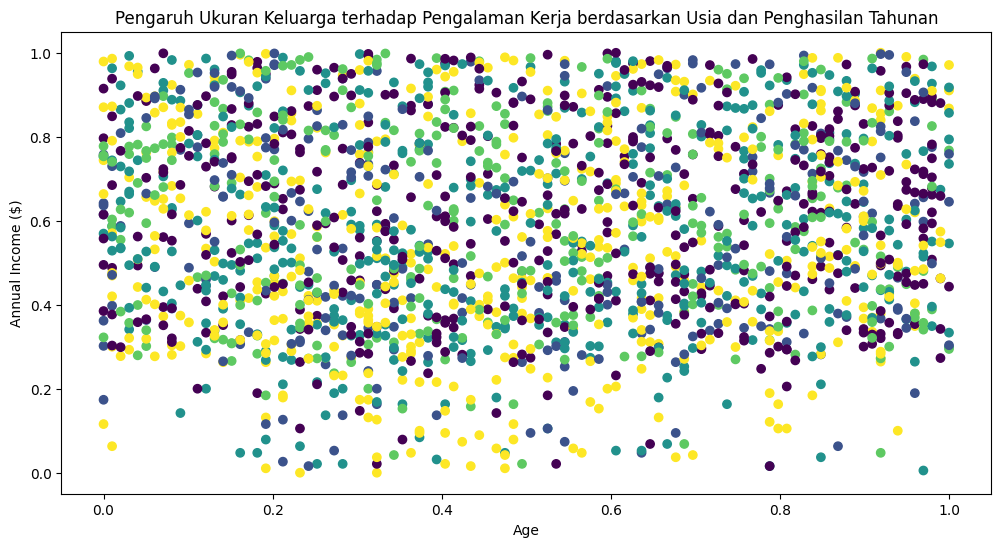

In [21]:
tom.figure(figsize=(12,6))
tom.scatter(angtom['Age'], angtom['Annual Income ($)'], c=angtom['Cluster'])
tom.xlabel('Age')
tom.ylabel('Annual Income ($)')
tom.title('Pengaruh Ukuran Keluarga terhadap Pengalaman Kerja berdasarkan Usia dan Penghasilan Tahunan')
tom.show()